<a href="https://colab.research.google.com/github/nadhimmna/Tugas-Machine-Learning/blob/main/Tugas%20Minggu%2011/Tugas_minggu_11_CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama       : Muhammad Nadhim Abdirrahman
* NIM        : 1103210018
* Model      : CIFAR10 CNN

In [34]:
%matplotlib inline

In [35]:
import torch  # Mengimpor pustaka PyTorch, yang merupakan pustaka machine learning berbasis tensor yang digunakan untuk deep learning.
import torchvision  # Mengimpor pustaka torchvision, yang menyediakan dataset, model, dan transformasi gambar yang umum digunakan untuk visi komputer.
import torchvision.transforms as transforms  # Mengimpor modul transforms dari torchvision dan memberi alias 'transforms'.

In [36]:
transform = transforms.Compose(  # Menggabungkan beberapa transformasi menjadi satu.
    [transforms.ToTensor(),  # Mengubah gambar menjadi tensor.
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # Menormalisasi tensor dengan mean dan std dev sebesar 0.5.

batch_size = 4  # Menentukan ukuran batch untuk pelatihan dan pengujian.
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)  # Mengunduh dan memuat dataset CIFAR-10 untuk pelatihan.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)  # Membuat DataLoader untuk trainset dengan shuffling.
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)  # Mengunduh dan memuat dataset CIFAR-10 untuk pengujian.
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)  # Membuat DataLoader untuk testset tanpa shuffling.

classes = ('plane', 'car', 'bird', 'cat',  # Mendefinisikan label kelas untuk dataset CIFAR-10.
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


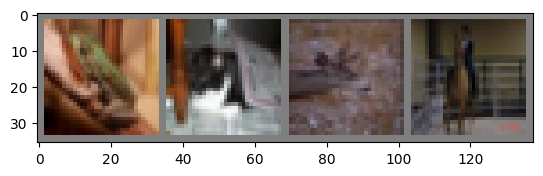

frog  cat   deer  horse


In [37]:
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk membuat plot dan visualisasi.
import numpy as np  # Mengimpor pustaka NumPy untuk operasi array.

# Fungsi untuk menampilkan gambar
def imshow(img):
    img = img / 2 + 0.5  # Menghilangkan normalisasi dari gambar (unnormalize).
    npimg = img.numpy()  # Mengubah tensor menjadi array NumPy.
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Menampilkan gambar dengan transposisi dimensi yang benar.
    plt.show()  # Menampilkan plot.

# Mengambil beberapa gambar pelatihan secara acak
dataiter = iter(trainloader)  # Membuat iterator untuk trainloader.
images, labels = next(dataiter)  # Mendapatkan batch gambar dan label berikutnya dari iterator.

# Menampilkan gambar
imshow(torchvision.utils.make_grid(images))  # Membuat grid dari beberapa gambar dan menampilkannya menggunakan imshow.

# Mencetak label
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))  # Mencetak label kelas untuk setiap gambar dalam batch.

In [38]:
import torch.nn as nn  # Mengimpor modul neural network dari PyTorch.
import torch.nn.functional as F  # Mengimpor modul fungsi-fungsi yang sering digunakan dalam neural network.

class Net(nn.Module):  # Mendefinisikan kelas Net yang merupakan subclass dari nn.Module.
    def __init__(self):  # Konstruktor untuk inisialisasi layer jaringan.
        super().__init__()  # Memanggil konstruktor dari nn.Module.
        self.conv1 = nn.Conv2d(3, 6, 5)  # Mendefinisikan convolutional layer pertama (input 3 channel, output 6 channel, kernel size 5x5).
        self.pool = nn.MaxPool2d(2, 2)  # Mendefinisikan max pooling layer dengan ukuran kernel 2x2 dan stride 2.
        self.conv2 = nn.Conv2d(6, 16, 5)  # Mendefinisikan convolutional layer kedua (input 6 channel, output 16 channel, kernel size 5x5).
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # Mendefinisikan fully connected layer pertama (input 16*5*5 neuron, output 120 neuron).
        self.fc2 = nn.Linear(120, 84)  # Mendefinisikan fully connected layer kedua (input 120 neuron, output 84 neuron).
        self.fc3 = nn.Linear(84, 10)  # Mendefinisikan fully connected layer ketiga (input 84 neuron, output 10 neuron).

    def forward(self, x):  # Mendefinisikan forward pass jaringan.
        x = self.pool(F.relu(self.conv1(x)))  # Menerapkan conv1, ReLU, dan pooling pada input x.
        x = self.pool(F.relu(self.conv2(x)))  # Menerapkan conv2, ReLU, dan pooling.
        x = torch.flatten(x, 1)  # Flattening tensor kecuali untuk dimensi batch.
        x = F.relu(self.fc1(x))  # Menerapkan fc1 dan ReLU.
        x = F.relu(self.fc2(x))  # Menerapkan fc2 dan ReLU.
        x = self.fc3(x)  # Menerapkan fc3.
        return x  # Mengembalikan output akhir.

net = Net()  # Membuat instance dari jaringan Net.

In [39]:
import torch.optim as optim  # Mengimpor modul optimisasi dari PyTorch.

criterion = nn.CrossEntropyLoss()  # Mendefinisikan fungsi loss sebagai Cross-Entropy Loss, yang umum digunakan untuk klasifikasi.
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)  # Mendefinisikan optimizer sebagai Stochastic Gradient Descent (SGD) dengan learning rate 0.001 dan momentum 0.9.

In [40]:
for epoch in range(2):  # Melakukan iterasi melalui dataset sebanyak 2 kali (2 epoch).

    running_loss = 0.0  # Inisialisasi running loss untuk melacak loss selama pelatihan.
    for i, data in enumerate(trainloader, 0):  # Enumerasi melalui trainloader, mendapatkan indeks dan data (inputs, labels).
        inputs, labels = data  # Memisahkan data menjadi inputs (gambar) dan labels (kelas).

        optimizer.zero_grad()  # Mengatur gradien parameter menjadi nol sebelum backward pass.

        outputs = net(inputs)  # Forward pass: menghitung output dari jaringan untuk inputs.
        loss = criterion(outputs, labels)  # Menghitung loss antara outputs dan labels yang sebenarnya.
        loss.backward()  # Backward pass: menghitung gradien dari loss dengan menghitung backward pass.
        optimizer.step()  # Optimizer step: memperbarui parameter jaringan berdasarkan gradien yang dihitung.

        running_loss += loss.item()  # Menambahkan nilai loss saat ini ke running loss.
        if i % 2000 == 1999:  # Setiap 2000 mini-batch (dimulai dari 0 hingga 1999), cetak statistik.
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')  # Cetak epoch, mini-batch, dan average loss.
            running_loss = 0.0  # Reset running loss setelah mencetak statistik.

print('Finished Training')  # Cetak pesan setelah selesai melatih model.

[1,  2000] loss: 2.231
[1,  4000] loss: 1.992
[1,  6000] loss: 1.762
[1,  8000] loss: 1.612
[1, 10000] loss: 1.565
[1, 12000] loss: 1.497
[2,  2000] loss: 1.422
[2,  4000] loss: 1.402
[2,  6000] loss: 1.368
[2,  8000] loss: 1.327
[2, 10000] loss: 1.307
[2, 12000] loss: 1.320
Finished Training


In [41]:
PATH = './cifar_net.pth'  # Menentukan path (lokasi dan nama file) untuk menyimpan model yang telah dilatih.
torch.save(net.state_dict(), PATH)  # Menyimpan state dictionary dari model 'net' ke file yang ditentukan oleh 'PATH'.

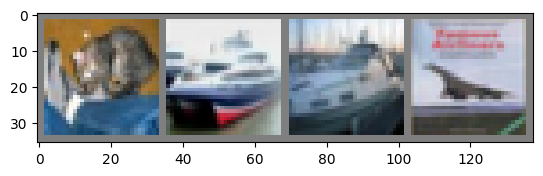

GroundTruth:  cat   ship  ship  plane


In [42]:
dataiter = iter(testloader)  # Membuat iterator untuk testloader.
images, labels = next(dataiter)  # Mengambil satu batch data pengujian.

imshow(torchvision.utils.make_grid(images))  # Menampilkan gambar-gambar dalam satu grid.
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))  # Mencetak label yang benar.

In [43]:
net = Net()  # Membuat instance baru dari model.
net.load_state_dict(torch.load(PATH))  # Memuat parameter model yang telah dilatih dari file yang disimpan.

<All keys matched successfully>

In [44]:
outputs = net(images)  # Meneruskan gambar-gambar melalui model untuk mendapatkan prediksi kelas.

In [45]:
_, predicted = torch.max(outputs, 1)  # Mencari kelas dengan probabilitas tertinggi untuk setiap gambar.
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'  # Mencetak kelas prediksi untuk setiap gambar.
                              for j in range(4)))            # Mengonversi indeks kelas menjadi label kelas.

Predicted:  cat   ship  car   ship 


In [46]:
correct = 0  # Inisialisasi jumlah prediksi yang benar.
total = 0  # Inisialisasi jumlah total gambar yang diuji.

with torch.no_grad():  # Memastikan bahwa tidak ada gradien yang dihitung karena kita hanya ingin melakukan evaluasi, bukan pelatihan.
    for data in testloader:  # Melakukan iterasi melalui setiap batch dalam testloader.
        images, labels = data  # Mendapatkan batch gambar dan label dari data.
        outputs = net(images)  # Mendapatkan prediksi dari model untuk batch gambar.
        _, predicted = torch.max(outputs.data, 1)  # Mengambil indeks kelas dengan probabilitas tertinggi sebagai prediksi.
        total += labels.size(0)  # Menambahkan jumlah gambar dalam batch ke total gambar yang diuji.
        correct += (predicted == labels).sum().item()  # Menambahkan jumlah prediksi yang benar.

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')  # Mencetak akurasi dari model pada dataset pengujian.

Accuracy of the network on the 10000 test images: 53 %


In [47]:
# Menyiapkan untuk menghitung prediksi yang benar untuk setiap kelas
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data  # Mendapatkan batch gambar dan label dari data.
        outputs = net(images)  # Mendapatkan prediksi dari model untuk batch gambar.
        _, predictions = torch.max(outputs, 1)  # Mengambil indeks kelas dengan probabilitas tertinggi sebagai prediksi.

        # Mengumpulkan prediksi yang benar untuk setiap kelas
        for label, prediction in zip(labels, predictions):
            if label == prediction:  # Memeriksa apakah prediksi sama dengan label
                correct_pred[classes[label]] += 1  # Jika benar, tambahkan ke prediksi yang benar untuk kelas tersebut
            total_pred[classes[label]] += 1  # Tambahkan ke total prediksi untuk kelas tersebut

# Mencetak akurasi untuk setiap kelas
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]  # Menghitung akurasi untuk kelas tertentu
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')  # Mencetak akurasi untuk kelas tersebut

Accuracy for class: plane is 64.1 %
Accuracy for class: car   is 71.9 %
Accuracy for class: bird  is 26.7 %
Accuracy for class: cat   is 17.2 %
Accuracy for class: deer  is 45.1 %
Accuracy for class: dog   is 36.4 %
Accuracy for class: frog  is 84.3 %
Accuracy for class: horse is 67.4 %
Accuracy for class: ship  is 66.9 %
Accuracy for class: truck is 58.9 %


In [48]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')  # Menentukan perangkat yang akan digunakan untuk komputasi, menggunakan CUDA jika tersedia, jika tidak, menggunakan CPU.
print(device)  # Mencetak perangkat yang digunakan untuk komputasi (CUDA jika tersedia, jika tidak, CPU).

cpu
